In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import matplotlib.pyplot as plt
import json
import spacy 
from spacy.matcher import Matcher
import pandas as pd
import re
from collections import Counter


filepath = os.path.join(os.getcwd(), 'machine-learning_dump.json')

with open(filepath, encoding='utf-8') as json_file:
    raw_data = json.load(json_file)
    
nlp = spacy.load("en_core_web_trf")
matcher = Matcher(nlp.vocab)




pattern = [{"POS": "NOUN"}]
wordlist = []

for question in raw_data["items"]:               
    text = question["body"]
    text = re.sub('<pre(.|\n)*?/pre>|<code>(.|\n)*?</code>|(<a(.*|\n)a>)|(<(p|\/p|br|sub|\/sub|em|\/em)>)', '', text)    
    text = re.sub('<p>|</p>|<a>|</a>|<br>', '' ,text)

    
    doc = nlp(text)
    matcher.add("match_nouns", [pattern])
    matches = matcher(doc)
    for match_id, start, end in matches:
        wordlist.append(doc[start:end].text)   

c = Counter(wordlist)
print("finished")

finished


['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

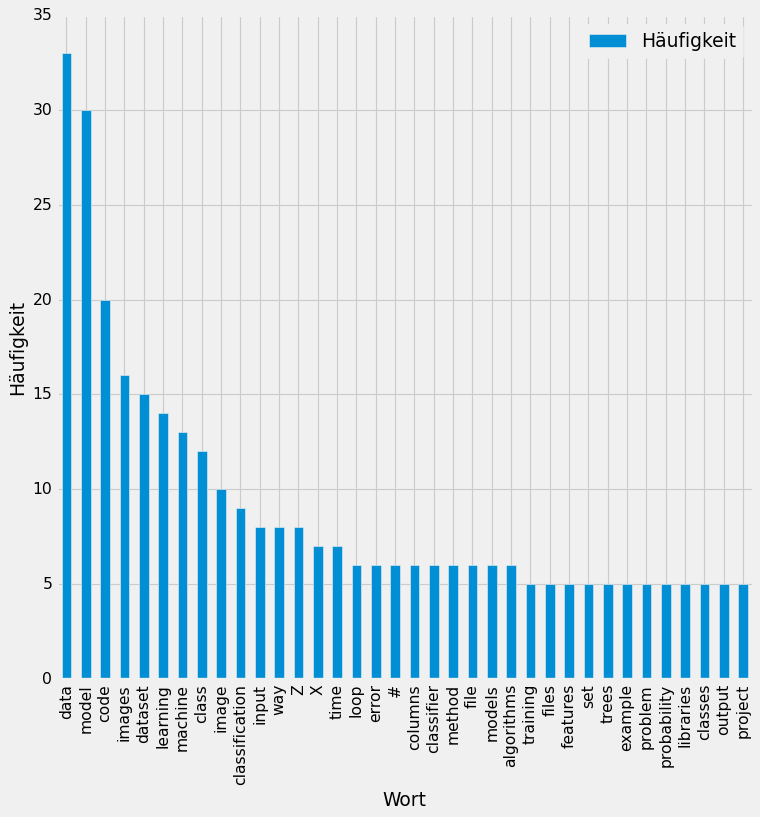

In [46]:
counter_bigger_than = Counter({k: c for k,c in c.items() if c >= 5})
sortedlist = counter_bigger_than.most_common()
df = pd.DataFrame.from_dict(counter_bigger_than, orient='index', columns=["Häufigkeit"]).sort_values(by=['Häufigkeit'], ascending=False)

#figure = plt.figure()
#ax1 = plt.ylabel('Anzahl')
#ax2 = plt.xlabel('Wort')
#plt.title('Anzahl Wörter in Stackoverflowposts')
plt.style.use('fivethirtyeight')

figure = df.plot(kind = 'bar', figsize=(10, 10), )
figure.set_xlabel("Wort")
figure.set_ylabel("Häufigkeit")
plt.style.available